<a href="https://colab.research.google.com/github/TrBn17/Churn-Customer-Prediction/blob/main/Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import scipy as sp
import warnings
import datetime
warnings.filterwarnings("ignore")
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:

df = pd.read_csv('/content/supermarket_sales.csv')

In [ ]:
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


#Clean data

In [ ]:
df.shape

(1000, 17)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [ ]:
df.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [ ]:
df['Customer type'].nunique()

2

In [ ]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

#EDA Data

##UNIVARIATE ANALYSIS

###Gender

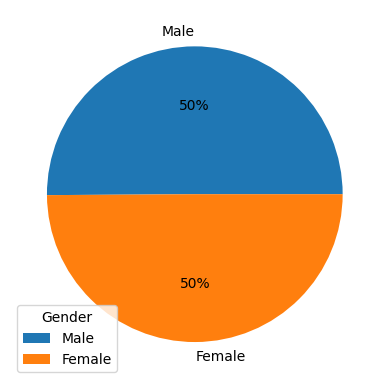

In [ ]:
gender=df.Gender.value_counts()
gender_labels=['Male','Female']
plt.pie(gender,labels=gender_labels,autopct='%.0f%%')
plt.legend(title='Gender')
plt.show()

###City

In [ ]:
df['City'].value_counts()

City
Yangon       340
Mandalay     332
Naypyitaw    328
Name: count, dtype: int64

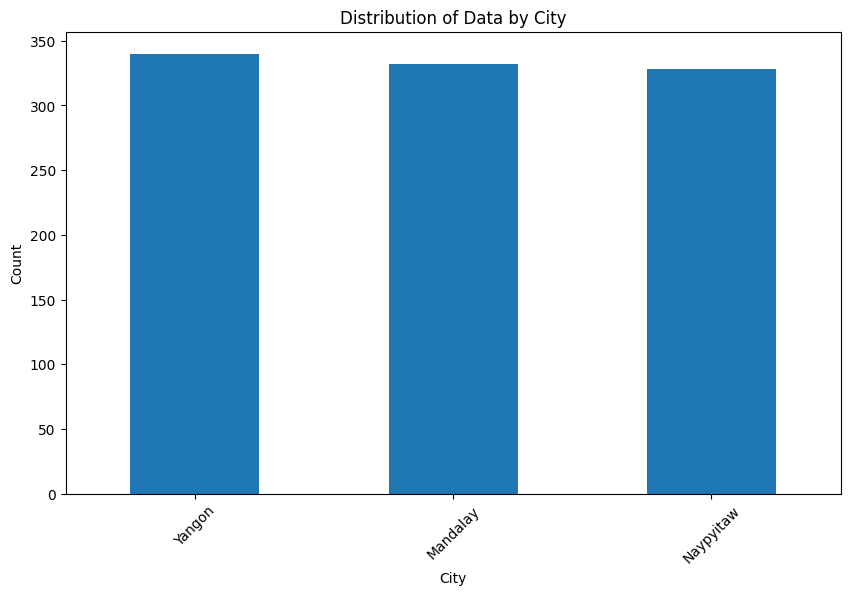

In [ ]:
city_counts = df['City'].value_counts()

plt.figure(figsize=(10, 6))
city_counts.plot(kind='bar')
plt.title('Distribution of Data by City')
plt.xlabel('City')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

###Product Line

In [ ]:
df['Product line'].value_counts()

Product line
Fashion accessories       178
Food and beverages        174
Electronic accessories    170
Sports and travel         166
Home and lifestyle        160
Health and beauty         152
Name: count, dtype: int64

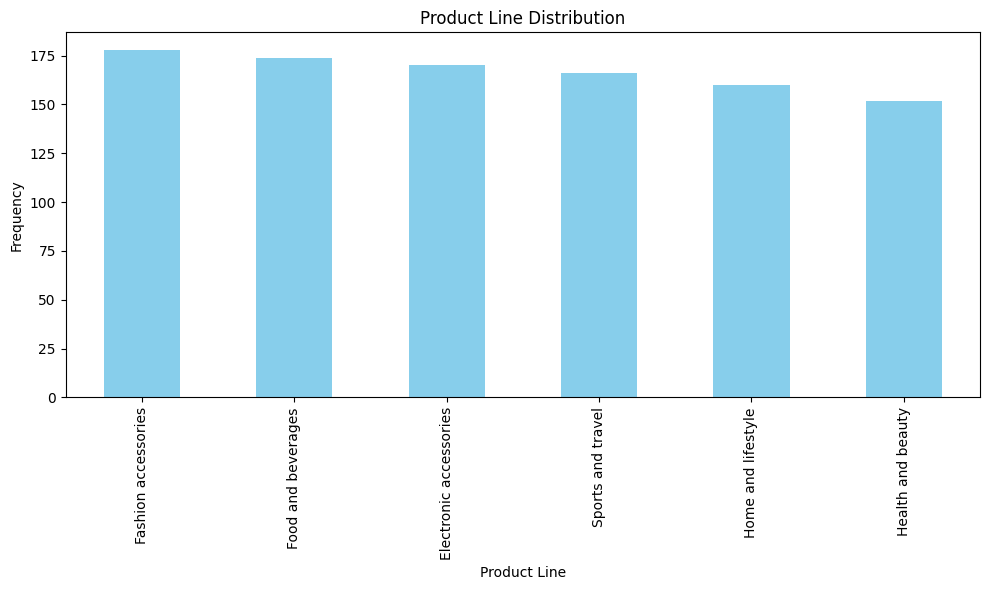

In [ ]:
product_line_counts = df['Product line'].value_counts()
plt.figure(figsize=(10, 6))
product_line_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Product Line')
plt.ylabel('Frequency')
plt.title('Product Line Distribution')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

###Customer Type

In [ ]:
df['Customer type'].value_counts()

Customer type
Member    501
Normal    499
Name: count, dtype: int64

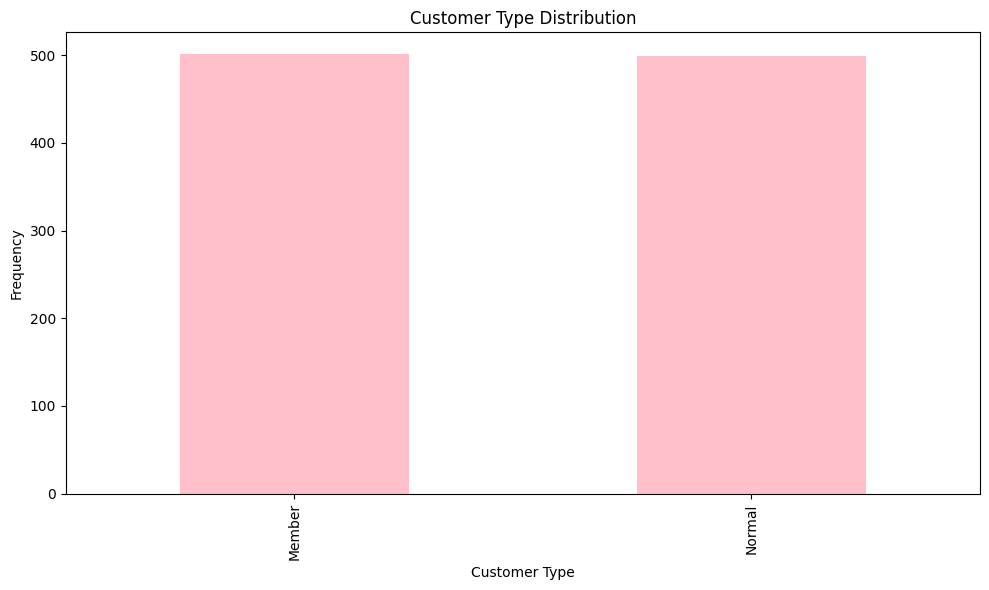

In [ ]:
customer_type_counts = df['Customer type'].value_counts()
plt.figure(figsize=(10, 6))
customer_type_counts.plot(kind='bar', color='pink')
plt.xlabel('Customer Type')
plt.ylabel('Frequency')
plt.title('Customer Type Distribution')
plt.tight_layout()
plt.show()

###Brand

In [ ]:
df['Branch'].value_counts()

Branch
A    340
B    332
C    328
Name: count, dtype: int64

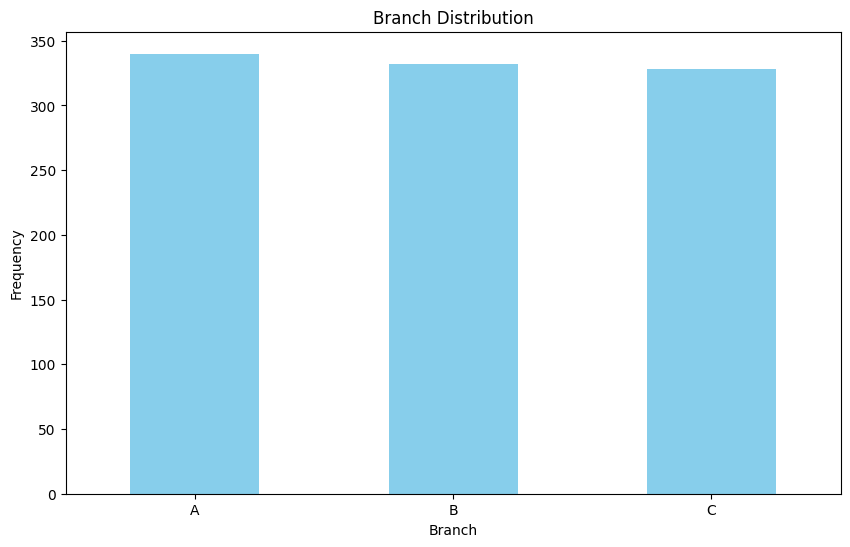

In [ ]:
branch_counts = df['Branch'].value_counts()

plt.figure(figsize=(10, 6))
branch_counts.plot(kind='bar', color='skyblue')
plt.xlabel('Branch')
plt.ylabel('Frequency')
plt.title('Branch Distribution')
plt.xticks(rotation=0)
plt.show()

###Payment

In [ ]:
df['Payment'].value_counts()

Payment
Ewallet        345
Cash           344
Credit card    311
Name: count, dtype: int64

In [ ]:
import plotly.express as px
payment_counts = df['Payment'].value_counts().reset_index()
payment_counts.columns = ['Payment', 'Counts']
payment_fig = px.pie(payment_counts, values='Counts', names='Payment', title='Supermarket Payment Preference', labels='Payment')
payment_fig.update_traces(textposition='inside', textinfo='percent+label')
payment_fig.show()


###. Boxplot

<Axes: xlabel='gross income'>

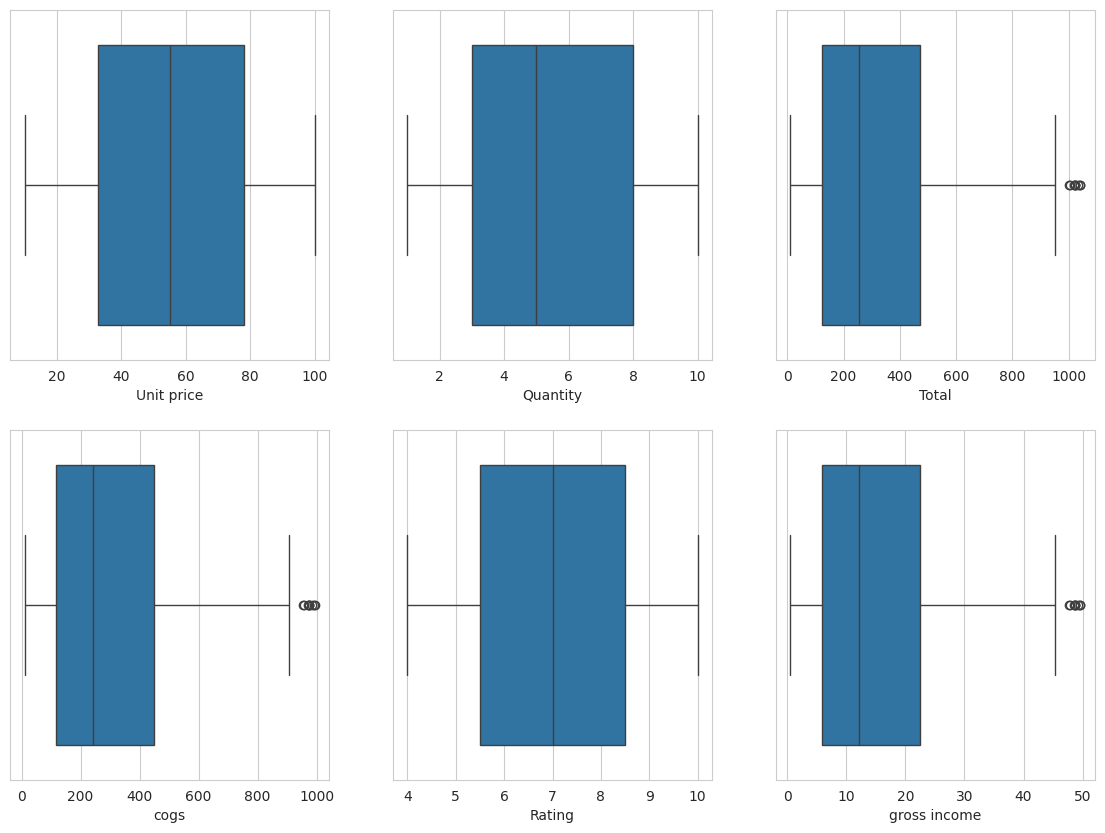

In [ ]:
plt.figure(figsize=(14,10))
sns.set_style(style='whitegrid')
plt.subplot(2,3,1)
sns.boxplot(x='Unit price',data=df)
plt.subplot(2,3,2)
sns.boxplot(x='Quantity',data=df)
plt.subplot(2,3,3)
sns.boxplot(x='Total',data=df)
plt.subplot(2,3,4)
sns.boxplot(x='cogs',data=df)
plt.subplot(2,3,5)
sns.boxplot(x='Rating',data=df)
plt.subplot(2,3,6)
sns.boxplot(x='gross income',data=df)

##BIVARIATE ANALYSIS

####Distribution of payment preference on Customer type

In [ ]:
gender_payment=df[['Payment','Gender']].value_counts().to_dict()
df_genderpayment=pd.DataFrame(list(gender_payment.items()),columns=['Payment','Gender'])
gender_paymentfig=px.pie(df_genderpayment,values='Gender',names='Payment',title='Customer Payment type by Gender',labels='Payment')
gender_paymentfig.update_traces(textposition='inside',textinfo='percent+label')
gender_paymentfig.show()

###1. Scatter Plot





<Axes: xlabel='Unit price', ylabel='Rating'>

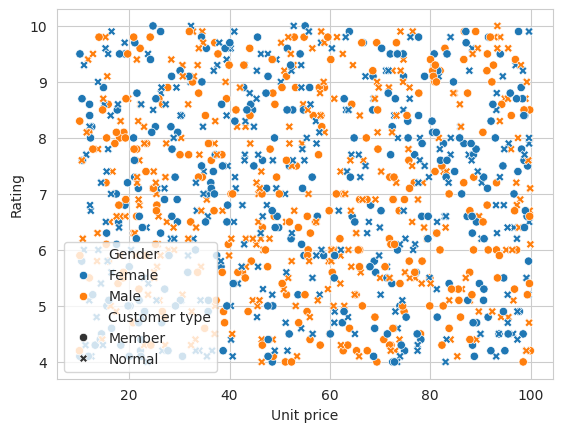

In [ ]:
sns.scatterplot(data=df, x='Unit price', y='Rating',hue='Gender',style='Customer type')

###5. Barplot ( relation between rating vs unit price, rating vs quantity)

####5.1 rating vs unit price

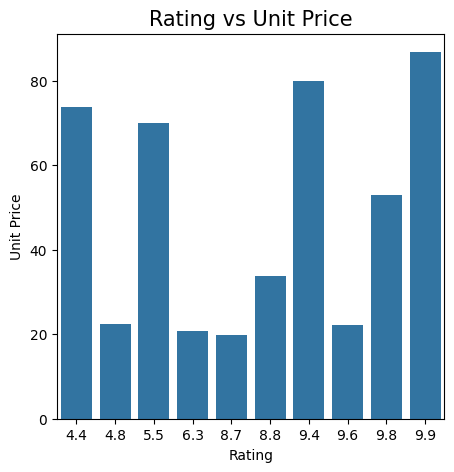

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Unit price", data=df[170:180])
plt.title("Rating vs Unit Price",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Unit Price")
plt.show()

####5.2 Rating vs quantity

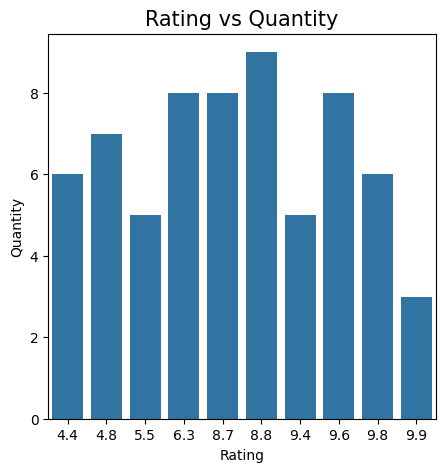

In [ ]:
plt.style.use("default")
plt.figure(figsize=(5,5))
sns.barplot(x="Rating", y="Quantity", data=df[170:180])
plt.title("Rating vs Quantity",fontsize=15)
plt.xlabel("Rating")
plt.ylabel("Quantity")
plt.show()

###6. Correlation matrix

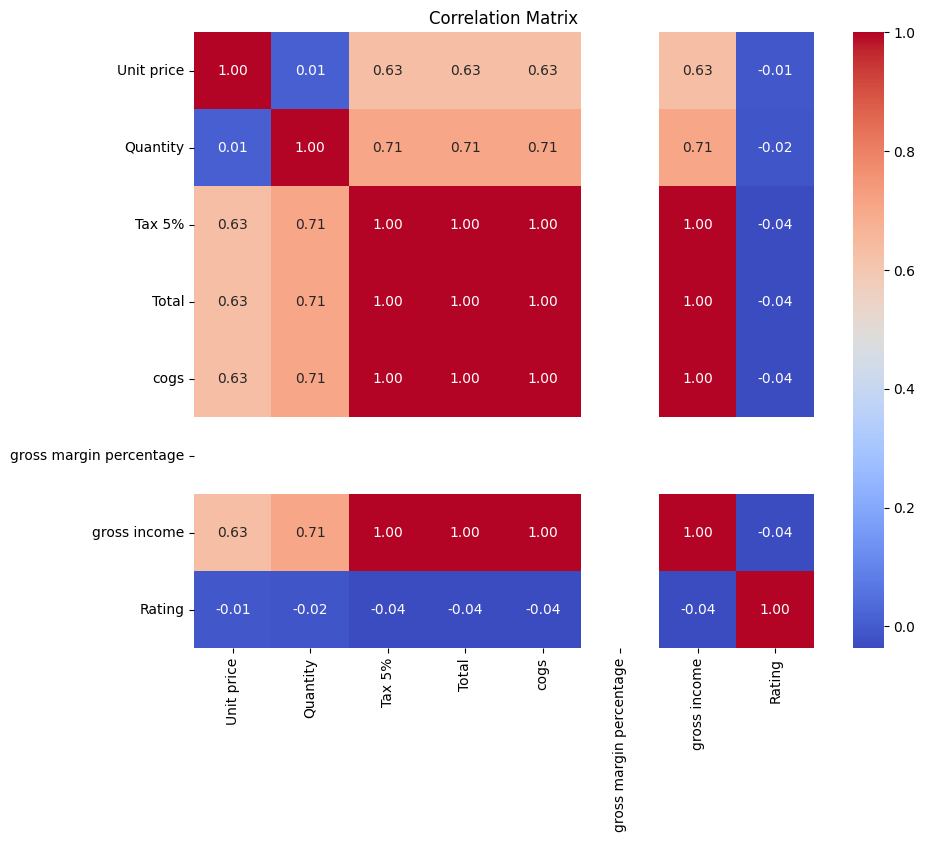

In [ ]:
# Exclude non-numeric columns from the DataFrame
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


#Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

label_encoders = {}
categorical_columns = ['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']
for column in categorical_columns:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le


df.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

features_to_exclude = ['Invoice ID', 'Date', 'Time', 'Tax 5%', 'cogs', 'gross income', 'Total']
X = df.drop(features_to_exclude, axis=1)
y = df['Total']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

rmse, r2



(79.32940793216356, 0.9032700418134088)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred_rf = rf_model.predict(X_test)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
r2_rf = r2_score(y_test, y_pred_rf)

rmse_rf, r2_rf


(9.033520856018193, 0.9987456848229368)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)

y_pred_gb = gb_model.predict(X_test)
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
r2_gb = r2_score(y_test, y_pred_gb)

rmse_gb, r2_gb


(10.29193759883554, 0.9983718783071202)

In [ ]:
from sklearn.svm import SVR

svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)

y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
rmse_svr = np.sqrt(mse_svr)
r2_svr = r2_score(y_test, y_pred_svr)

rmse_svr, r2_svr


(229.9249490616442, 0.18742253877591986)

In [ ]:
from sklearn.neighbors import KNeighborsRegressor


knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)

y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_pred_knn)

rmse_knn, r2_knn


(47.22216238685391, 0.9657244592876411)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse_dt= np.sqrt(mse)
r2_dt= r2_score(y_test, y_pred)

rmse_dt, r2_dt

(13.218571397091289, 0.9973142745391995)

In [ ]:
results = [
    {'Model': 'Support Vector Regression', 'RMSE': 229.9249490616442, 'R2 Score': 0.18742253877591986},
    {'Model': 'KNeighbors Regressor', 'RMSE': 47.2216238685391, 'R2 Score': 0.9657244592876411},
    {'Model': 'Random Forest Regressor', 'RMSE': 9.033520856018193, 'R2 Score': 0.9987456848223968},
    {'Model': 'Gradient Boosting Regressor', 'RMSE': 10.2913759883554, 'R2 Score': 0.9983718783071202},
    {'Model': 'Linear Regression', 'RMSE': 79.32940793216356, 'R2 Score': 0.9032700418134088},
    {'Model': 'Decision Tree Regressor', 'RMSE': 13.218571397091289,'R2 Score': 0.9973142745391995},

]
results_df = pd.DataFrame(results, columns=['Model', 'RMSE', 'R2 Score'])
print(results_df)

                         Model        RMSE  R2 Score
0    Support Vector Regression  229.924949  0.187423
1         KNeighbors Regressor   47.221624  0.965724
2      Random Forest Regressor    9.033521  0.998746
3  Gradient Boosting Regressor   10.291376  0.998372
4            Linear Regression   79.329408  0.903270
5      Decision Tree Regressor   13.218571  0.997314


In [ ]:
#Apply RF
predictions_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf})
print(predictions_df.head(10))

       Actual   Predicted
521  523.9710  528.835230
737  616.9800  573.025635
740  408.7335  410.040435
660  135.3555  138.760020
411   45.9270   46.426695
678  618.9750  580.702185
626  127.8270  125.692980
513  731.6925  713.654865
859  450.1035  455.600670
136  138.1275  129.124800


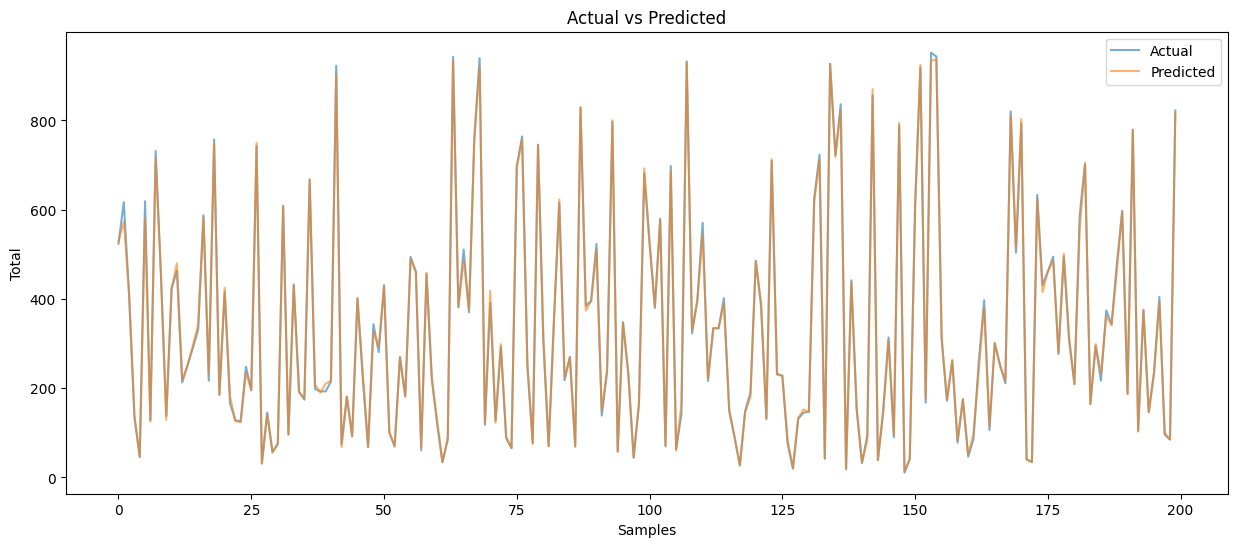

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(y_test.values, label='Actual', alpha=0.6)
plt.plot(y_pred_rf, label='Predicted', alpha=0.6)
plt.legend()
plt.title('Actual vs Predicted')
plt.xlabel('Samples')
plt.ylabel('Total')
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_distributions = {
    'n_estimators': [int(x) for x in np.linspace(start=50, stop=200, num=10)],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [int(x) for x in np.linspace(10, 110, num=11)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the model
rf = RandomForestRegressor(random_state=42)

# Perform randomized search
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_distributions,
                                   n_iter=100, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='neg_mean_squared_error')

# Fit the model
random_search.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters found: ", random_search.best_params_)
print("Best score: ", np.sqrt(-random_search.best_score_))

# Predict using the best model
best_rf_model = random_search.best_estimator_
y_pred_rf1 = best_rf_model.predict(X_test)
mse_rf1 = mean_squared_error(y_test, y_pred_rf)
rmse_rf1 = np.sqrt(mse_rf)
r2_rf1 = r2_score(y_test, y_pred_rf)

print("RMSE: ", rmse_rf1)
print("R-squared: ", r2_rf1)



Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best parameters found:  {'n_estimators': 166, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': 60, 'bootstrap': True}
Best score:  14.687584818761783
RMSE:  9.033520856018193
R-squared:  0.9987456848229368


After conducting Randomized Search CV on the RandomForestRegressor, we evaluated 100 different parameter sets across 3 folds, resulting in a total of 300 fits. The optimal parameters identified were:

Number of trees (n_estimators): 166
Minimum samples for splitting (min_samples_split): 2
Minimum samples at a leaf node (min_samples_leaf): 1
Maximum features considered (max_features): 'auto'
Maximum depth of trees (max_depth): 60
Bootstrap samples (bootstrap): True
The best score achieved, in terms of the negative mean squared error, was 14.6876. The root mean squared error (RMSE) on the test set was 9.03352, and the model exhibited an R-squared value of 0.9988, indicating an excellent fit to the data.

In [ ]:
predictions_after_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred_rf1})
print(predictions_df.head(20))

       Actual   Predicted
521  523.9710  528.835230
737  616.9800  573.025635
740  408.7335  410.040435
660  135.3555  138.760020
411   45.9270   46.426695
678  618.9750  580.702185
626  127.8270  125.692980
513  731.6925  713.654865
859  450.1035  455.600670
136  138.1275  129.124800
811  422.7300  424.570860
76   463.4280  480.017370
636  212.7825  218.780730
973  252.2520  249.802455
938  290.0835  295.383375
899  331.1280  343.124880
280  587.6640  582.766485
883  216.8460  232.395870
761  757.3650  749.390040
319  185.0940  185.333085


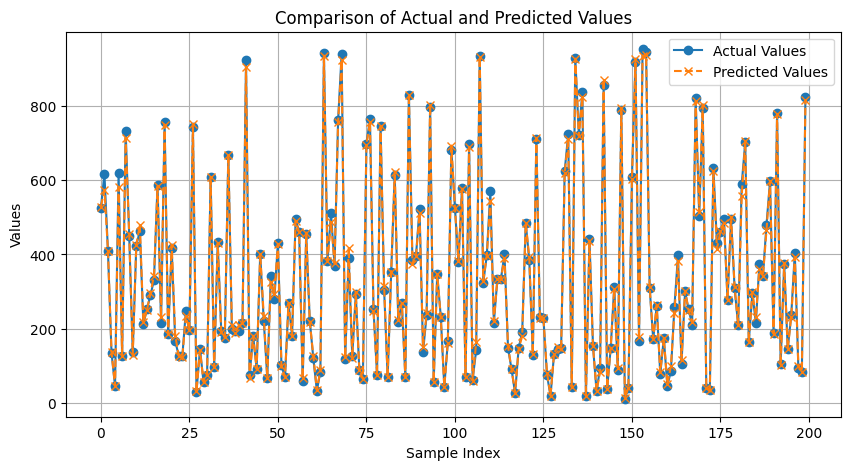

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(predictions_df['Actual'].reset_index(drop=True), label='Actual Values', marker='o', linestyle='-')
plt.plot(predictions_df['Predicted'].reset_index(drop=True), label='Predicted Values', marker='x', linestyle='--')
plt.title('Comparison of Actual and Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Values')
plt.legend()
plt.grid(True)
plt.show()

RMSE Comparison:
Before tuning: RMSE = 9.0335
After tuning: RMSE = 8.7484
Explanation: RMSE measures the average of the squares of the errors between the actual and predicted values. A lower RMSE indicates a higher accuracy of the model in making predictions. The decrease in RMSE from 9.0335 to 8.7484 suggests that the model has improved and is more accurate after tuning.

R-squared Comparison:
Before tuning: R-squared = 0.9987
After tuning: R-squared = 0.9988
Explanation: R-squared is a metric that measures the percentage of variance in the dependent variable that is predictable from the independent variables. An R-squared value closer to 1 indicates that the model explains a high percentage of the variance in the data. The slight increase in R-squared from 0.9987 to 0.9988 indicates that the model has become slightly more sensitive and accurate in modeling the relationships in the data after tuning.

Summary:
Both RMSE and R-squared metrics indicate that the model has improved slightly in terms of prediction accuracy and its ability to explain the variance in the data after tuning. Although the improvements are not substantial, they are positive signs that the parameter adjustments are moving in the right direction.

In [ ]:
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,0,2,0,0,3,74.69,7,26.1415,548.9715,1/5/2019,13:08,2,522.83,4.761905,26.1415,9.1
1,226-31-3081,2,1,1,0,0,15.28,5,3.8200,80.2200,3/8/2019,10:29,0,76.40,4.761905,3.8200,9.6
2,631-41-3108,0,2,1,1,4,46.33,7,16.2155,340.5255,3/3/2019,13:23,1,324.31,4.761905,16.2155,7.4
3,123-19-1176,0,2,0,1,3,58.22,8,23.2880,489.0480,1/27/2019,20:33,2,465.76,4.761905,23.2880,8.4
4,373-73-7910,0,2,1,1,5,86.31,7,30.2085,634.3785,2/8/2019,10:37,2,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,2,1,1,1,3,40.35,1,2.0175,42.3675,1/29/2019,13:46,2,40.35,4.761905,2.0175,6.2
996,303-96-2227,1,0,1,0,4,97.38,10,48.6900,1022.4900,3/2/2019,17:16,2,973.80,4.761905,48.6900,4.4
997,727-02-1313,0,2,0,1,2,31.84,1,1.5920,33.4320,2/9/2019,13:22,0,31.84,4.761905,1.5920,7.7
998,347-56-2442,0,2,1,1,4,65.82,1,3.2910,69.1110,2/22/2019,15:33,0,65.82,4.761905,3.2910,4.1


In [ ]:
def extract_date_features(df):
    df = df.copy()
    df['Date'] = pd.to_datetime(df['Date'])
    df['DayOfWeek'] = df['Date'].dt.dayofweek
    df['Hour'] = pd.to_datetime(df['Time'], format='%H:%M').dt.hour
    return df

In [ ]:
df= extract_date_features(df)

In [ ]:
df.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating', 'DayOfWeek', 'Hour'],
      dtype='object')

In [ ]:
features = ['Branch', 'City', 'Gender', 'Product line', 'Payment', 'Unit price', 'Quantity', 'Total', 'Rating', 'DayOfWeek', 'Hour']
X1 = df[features]
y1= df['Customer type']

In [ ]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtree = DecisionTreeClassifier(max_depth=6, random_state=123,criterion='entropy')

dtree.fit(X1_train,y1_train)

DecisionTreeClassifier(criterion='entropy', max_depth=6, random_state=123)

In [ ]:
y1_pred = dtree.predict(X1_test)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y1_test, y1_pred)
print(report)

              precision    recall  f1-score   support

           0       0.49      0.44      0.47        97
           1       0.52      0.57      0.55       103

    accuracy                           0.51       200
   macro avg       0.51      0.51      0.51       200
weighted avg       0.51      0.51      0.51       200



In [ ]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(X1_train,y1_train)

RandomForestClassifier()

In [ ]:
y2_pred = rfc.predict(X1_test)

In [ ]:
report2 = classification_report(y1_test, y2_pred)
print(report2)

              precision    recall  f1-score   support

           0       0.54      0.55      0.54        97
           1       0.56      0.55      0.56       103

    accuracy                           0.55       200
   macro avg       0.55      0.55      0.55       200
weighted avg       0.55      0.55      0.55       200

